## Analyze Speech Sounds Script

### Basic Set-up

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Read in data
df = pd.read_csv("C:/Users/abbyb/Documents/cucumber/thesis/alldata.csv")
data = pd.DataFrame(df)

In [3]:
# Examine cue values
df.describe()

,f0,f1,f2,f3,f4,maxpf,rms_v,vl,m1,m2,m3,m4,m1trans,m2trans,m3trans,m4trans,rms_a,vot,lowA,prev
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,156.464955,545.004804,1634.695555,2600.676414,3676.801305,1448.609824,56.150890,0.259311,2117.633062,1280.278429,2.609511,32.744004,665.332455,759.822465,4.248865,37.196163,49.006401,0.051247,42.221380,0.005358
std,65.928013,247.352962,580.420881,694.473818,926.719761,1699.128860,7.440035,0.080320,1731.428608,638.695917,4.063178,113.652123,335.216262,406.035299,2.551310,54.863057,7.662442,0.033299,9.928076,0.020658
min,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,39.122510,0.090040,52.837047,103.236356,-3.983553,-1.836924,187.345606,159.336828,-0.418917,-1.712218,26.826333,0.003761,17.312134,0.000000
25%,107.078997,420.677152,1310.523884,2389.684687,3371.323009,50.000000,51.122363,0.200939,540.158197,737.623062,0.115805,0.297834,444.300383,464.148496,2.553437,8.215236,43.807936,0.020093,35.045929,0.000000
50%,147.252439,515.489208,1647.009331,2660.411411,3753.765000,550.000000,55.068816,0.248345,1715.807870,1282.845545,1.604203,4.057739,580.181818,671.635903,3.795518,19.525111,47.912661,0.045447,41.068110,0.000000
75%,200.857558,657.489200,1996.149171,3020.322497,4209.196087,2500.000000,59.677512,0.309682,3524.118708,1732.066945,3.850258,19.427421,778.366062,961.476027,5.325078,43.430632,53.329883,0.079211,48.513088,0.000000
max,559.655451,2554.912162,3542.957683,4486.575031,5682.544280,7650.000000,81.597944,0.705731,6921.414277,3170.928937,30.591910,1478.295757,3018.635801,2890.963701,19.724347,513.296365,76.191931,0.148961,75.917242,0.138702


In [4]:
# Remove white space
df.columns = df.columns.str.replace(' ', '')

### Parse out variables from name of sound

In [5]:
# Parse gender & talker
df['gender'] = df['soundName'].astype(str).str[0]
df['talker'] = df['soundName'].astype(str).str[1:4]

In [6]:
# Parse consonant & vowel
df['consonant'] = df['soundName'].astype(str).str[7:8]
df['vowel'] = df['soundName'].astype(str).str[8:10]

# Remove white space
df.columns = df.columns.str.replace(' ', '')
df.head()

,soundName,f0,f1,f2,f3,f4,maxpf,rms_v,vl,m1,...,m3trans,m4trans,rms_a,vot,lowA,prev,gender,talker,consonant,vowel
0,f101_s_ba,195.430324,694.747566,1157.458571,2742.378385,4056.205340,50,54.298791,0.234710,114.402690,...,2.199729,25.810920,68.035161,0.024115,67.707384,0.0,f,101,b,a
1,f101_s_bc,201.865510,601.283352,977.953129,2948.936559,4089.178626,50,50.550725,0.373502,212.230855,...,8.555120,151.312022,46.755428,0.022625,45.691294,0.0,f,101,b,c
2,f101_s_be,211.882616,499.662246,2130.824472,3070.944234,4338.589522,50,54.860337,0.290115,406.599524,...,7.275200,64.105478,49.705903,0.022941,48.996482,0.0,f,101,b,e
3,f101_s_bi,204.583280,338.119874,2591.405572,3332.660253,4184.592037,50,52.499039,0.293457,230.939521,...,2.762354,6.359707,61.343516,0.017395,61.058226,0.0,f,101,b,i
4,f101_s_bo,194.820592,617.307219,1384.135639,2915.160638,4136.278768,50,48.892192,0.276500,694.113623,...,5.969029,50.501581,44.267683,0.026701,43.159157,0.0,f,101,b,o


In [7]:
# Set voicing & place
df['voicing'] = df['consonant'].map({'b': 'voiced', 'd': 'voiced', 'g': 'voiced',
                                    'p': 'voiceless', 't': 'voiceless', 'k': 'voiceless'})
df['place'] = df['consonant'].map({'b': 'bilabial', 'd': 'alveolar', 'g': 'velar',
                                    'p': 'bilabial', 't': 'alveolar', 'k': 'velar'})

In [8]:
# Remove rows with 0 values for f0/f1/f2/f3/f4
df = df[~(df[['f0','f1','f2','f3','f4']] == 0).any(axis=1)]
df['vot'] = df['vot']*1000
df['vl'] = df['vl']*1000
df.head()

,soundName,f0,f1,f2,f3,f4,maxpf,rms_v,vl,m1,...,rms_a,vot,lowA,prev,gender,talker,consonant,vowel,voicing,place
0,f101_s_ba,195.430324,694.747566,1157.458571,2742.378385,4056.205340,50,54.298791,234.709778,114.402690,...,68.035161,24.115021,67.707384,0.0,f,101,b,a,voiced,bilabial
1,f101_s_bc,201.865510,601.283352,977.953129,2948.936559,4089.178626,50,50.550725,373.501820,212.230855,...,46.755428,22.624952,45.691294,0.0,f,101,b,c,voiced,bilabial
2,f101_s_be,211.882616,499.662246,2130.824472,3070.944234,4338.589522,50,54.860337,290.114890,406.599524,...,49.705903,22.941079,48.996482,0.0,f,101,b,e,voiced,bilabial
3,f101_s_bi,204.583280,338.119874,2591.405572,3332.660253,4184.592037,50,52.499039,293.457434,230.939521,...,61.343516,17.394839,61.058226,0.0,f,101,b,i,voiced,bilabial
4,f101_s_bo,194.820592,617.307219,1384.135639,2915.160638,4136.278768,50,48.892192,276.500329,694.113623,...,44.267683,26.700979,43.159157,0.0,f,101,b,o,voiced,bilabial


In [9]:
# Create long format df
df2 = pd.melt(df, id_vars=['soundName','gender','talker','consonant','vowel','voicing','place'], 
        value_vars=['f0','f1','f2','f3','f4','maxpf','rms_v','vl','m1','m2','m3','m4',
                             'm1trans','m2trans','m3trans','m4trans','rms_a','vot','lowA'])
df2.head()

,soundName,gender,talker,consonant,vowel,voicing,place,variable,value
0,f101_s_ba,f,101,b,a,voiced,bilabial,f0,195.430324
1,f101_s_bc,f,101,b,c,voiced,bilabial,f0,201.865510
2,f101_s_be,f,101,b,e,voiced,bilabial,f0,211.882616
3,f101_s_bi,f,101,b,i,voiced,bilabial,f0,204.583280
4,f101_s_bo,f,101,b,o,voiced,bilabial,f0,194.820592


### Compute cue reliabilities by phoneme

In [10]:
# Set up some variables
listCues = df2.variable.unique()
listCats = df2.consonant.unique()
cueWts = pd.DataFrame()
row = 1

In [11]:
# Loop through all data
for c in listCues:
  currentData = df2.loc[df2['variable'] == c]
  w = 0;
  
  for i in listCats:
    for j in listCats:
      
      # get mean of current categories
      data_i = currentData.loc[currentData['consonant']==i]
      mean_i = data_i['value'].mean()
      data_j = currentData.loc[currentData['consonant']==j]
      mean_j = data_j['value'].mean()
      
      # get sd of current categories
      sd_i = data_i.loc[:,'value'].std()
      sd_j = data_j.loc[:,'value'].std()
      
      # add to weight
      w = w + ( ((mean_i-mean_j)**2 )/(sd_i*sd_j) )
  w = w / 2
  cueWts.loc[row,'cue'] = c
  cueWts.loc[row,'weight'] = w
  row = row + 1


In [12]:
# View cue weights
cueWts = cueWts.sort_values('weight')
cueWts

,cue,weight
7,rms_v,0.122680
5,f4,0.447663
4,f3,0.927456
15,m3trans,1.117253
1,f0,1.131872
8,vl,1.545318
13,m1trans,1.708544
16,m4trans,1.742158
17,rms_a,1.837210
2,f1,2.072948


### Plot cue reliabilities

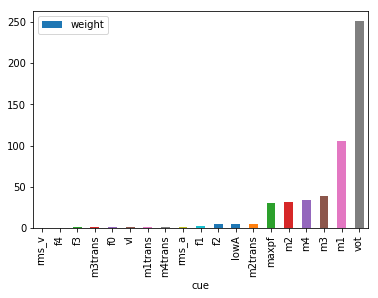

In [13]:
cueWts.plot(kind='bar',x='cue',y='weight')

### Plot top 2 cues scatterplot

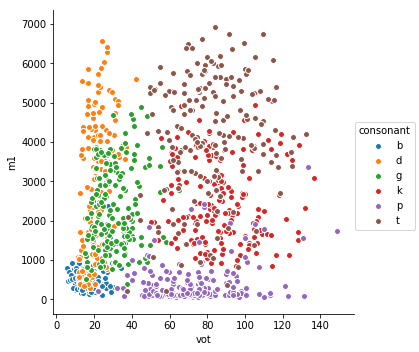

In [14]:
sns.pairplot(x_vars=["vot"], y_vars=["m1"], data=df, hue="consonant", size=5)

### See distributions of top 5 cues

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been

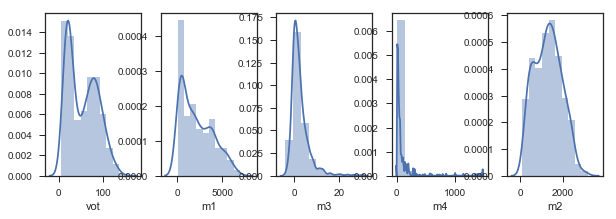

In [23]:
f, ax = plt.subplots(1, 5, figsize=(10,3))
vis1 = sns.distplot(df["vot"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["m1"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["m3"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["m4"],bins=10, ax=ax[3])
vis4 = sns.distplot(df["m2"],bins=10, ax=ax[4])

### Normalize cues

In [39]:
# To do here...
# Standarize features
scaler = StandardScaler()
cues = df.iloc[:,1:21]
#df_std['f0':'prev'] = scaler.fit_transform(df.loc[:, 'f0':'prev'])
std_cues = scaler.fit_transform(cues)
df.loc[:,1:21] = df_std
df.head()

,soundName,f0,f1,f2,f3,f4,maxpf,rms_v,vl,m1,...,rms_a,vot,lowA,prev,gender,talker,consonant,vowel,voicing,place
0,f101_s_ba,0.562476,0.607095,-1.149604,0.063718,0.416029,-0.840061,-0.239242,-0.321168,-1.185240,...,2.483945,-0.877110,2.590083,-0.264816,f,101,b,a,voiced,bilabial
1,f101_s_bc,0.664655,0.166824,-1.528364,0.535493,0.483399,-0.840061,-0.741588,1.393186,-1.128916,...,-0.292489,-0.922270,0.373436,-0.264816,f,101,b,c,voiced,bilabial
2,f101_s_be,0.823707,-0.311870,0.904221,0.814156,0.992984,-0.840061,-0.163979,0.363194,-1.017009,...,0.092469,-0.912689,0.706212,-0.264816,f,101,b,e,voiced,bilabial
3,f101_s_bi,0.707808,-1.072827,1.876058,1.411911,0.678343,-0.840061,-0.480459,0.404481,-1.118144,...,1.610865,-1.080783,1.920625,-0.264816,f,101,b,i,voiced,bilabial
4,f101_s_bo,0.552795,0.242306,-0.671310,0.458349,0.579632,-0.840061,-0.963877,0.195027,-0.851473,...,-0.617073,-0.798736,0.118493,-0.264816,f,101,b,o,voiced,bilabial


### Implement Multinomial Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
X = std_cues
Y = df['consonant']
multinom = LogisticRegression(random_state=0)
multinom.fit(X, Y)
multinom.score(X, Y)

0.807920792079208

In [52]:
# Confusion matrix
from sklearn import metrics
predictions = multinom.predict(X)
a = metrics.confusion_matrix(Y, predictions)
print(a)

[[128   5   7   0   0   0]
 [ 26 134  10   0   1   0]
 [  9  38 122   0   3   0]
 [  0   0   6 131  13  26]
 [  1   1   3   8 161   2]
 [  0   0   6  23   6 140]]


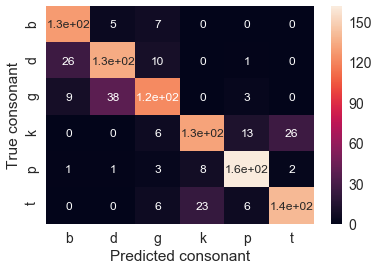

In [66]:
array = a
df_cm = pd.DataFrame(array, range(6), range(6))

x_axis_labels = ["b","d","g","k","p","t"] # labels for x-axis
y_axis_labels = ["b","d","g","k","p","t"] # labels for y-axis

# create seabvorn heatmap with required labels
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, #for font size
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted consonant")
plt.ylabel("True consonant")

plt.show()

### Conclusion: Using the cues in this dataset, a multinomial logistic regression model can accurately identify the stop consonant at about 81% correct.